In [743]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from scipy.sparse import hstack, csr_matrix
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Original Dataset (3 million rows)

        """
        # Loading the original dataset

        file_path = r'C:\Users\jcbur\OneDrive - peruvianbusinesscouncil.com\Personal\La Guardia\Predictive Analytics\Final Assignment - Ticket Classification\twcs\twcs.csv
        data = pd.read_csv(file_path)

        # Sampling the data (creating a 20,000 rows subset)

        data = data.sample(n=20000, random_state=42)

        # Saving the sampled data to a new CSV file

        output_file_path = r'C:\Users\jcbur\OneDrive - peruvianbusinesscouncil.com\Personal\La Guardia\Predictive Analytics\Final Assignment - Ticket Classification\twcs\sampled_data.csv'
        data.to_csv(output_file_path, index=False)
        """

# Workflow
- Data Exploration: Understanding the data structure, distributions, and potential issues.
- Missing Value Handling: Address missing data to avoid issues during model training.
- Correlation Analysis: Identify relationships between features to select or engineer useful features.
- Feature Engineering: Prepare data (e.g., text transformation, scaling, etc.)
- Model testing for Accuracy:
- Model Selection:
- Actionability: Predict Customer Sentiment to improve Customer Service Ratings

# The Dataset
- kaggle
- Data Source: Twitter.
- The original dataset contains over 2.9 million rows.
- A 20,000 rows sample has been created and saved as csv for better data manipulation.
- The dataset is distributed across 7 features

In [744]:
 # Load the sample-subset
file_path = r'C:\Users\jcbur\OneDrive - peruvianbusinesscouncil.com\Personal\La Guardia\Predictive Analytics\Final Assignment - Ticket Classification\twcs\sampled_data.csv'
data = pd.read_csv(file_path)

# Exploration

    # Displaying the First 5 Rows

In [745]:
data.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,192624,161253,True,Wed Oct 04 13:59:33 +0000 2017,@161252 What's that egg website people talk about,192623,192625.0
1,738238,296574,True,Fri Oct 06 18:29:06 +0000 2017,Why!🤷🏻‍♀️ #iOS11 @AppleSupport https://t.co/BX...,738237,NaN
2,2414302,AppleSupport,False,Tue Nov 14 17:38:01 +0000 2017,@693975 We can assist you. We recommend updati...,2414303,2414304.0
3,1793929,539096,True,Thu Oct 12 06:04:41 +0000 2017,@331912 @115955 Thats better than having an un...,1793928,1793930.0
4,2088018,617376,True,Mon Nov 06 20:30:49 +0000 2017,@VirginAmerica is probably one of the best air...,2088017,NaN


    # Data types and non-null counts

In [746]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tweet_id                 20000 non-null  int64  
 1   author_id                20000 non-null  object 
 2   inbound                  20000 non-null  bool   
 3   created_at               20000 non-null  object 
 4   text                     20000 non-null  object 
 5   response_tweet_id        12513 non-null  object 
 6   in_response_to_tweet_id  14374 non-null  float64
dtypes: bool(1), float64(1), int64(1), object(4)
memory usage: 957.2+ KB
None


    # Data Statistics (numerical and categorical)

In [747]:
print(data.describe(include='all'))

            tweet_id   author_id inbound                      created_at  \
count   2.000000e+04       20000   20000                           20000   
unique           NaN       10829       2                           19940   
top              NaN  AmazonHelp    True  Tue Nov 21 03:40:08 +0000 2017   
freq             NaN        1181   10897                               2   
mean    1.503770e+06         NaN     NaN                             NaN   
std     8.606173e+05         NaN     NaN                             NaN   
min     1.620000e+02         NaN     NaN                             NaN   
25%     7.632560e+05         NaN     NaN                             NaN   
50%     1.508010e+06         NaN     NaN                             NaN   
75%     2.242719e+06         NaN     NaN                             NaN   
max     2.987822e+06         NaN     NaN                             NaN   

                       text response_tweet_id  in_response_to_tweet_id  
count         

    # Checking for duplicates

In [748]:
print(f"Number of duplicate rows: {data.duplicated().sum()}")

Number of duplicate rows: 0


# Missing Values

    # Checking for missing values

In [749]:
print("Missing Values:")
print(data.isnull().sum())

Missing Values:
tweet_id                      0
author_id                     0
inbound                       0
created_at                    0
text                          0
response_tweet_id          7487
in_response_to_tweet_id    5626
dtype: int64


    # Visualizing missing values

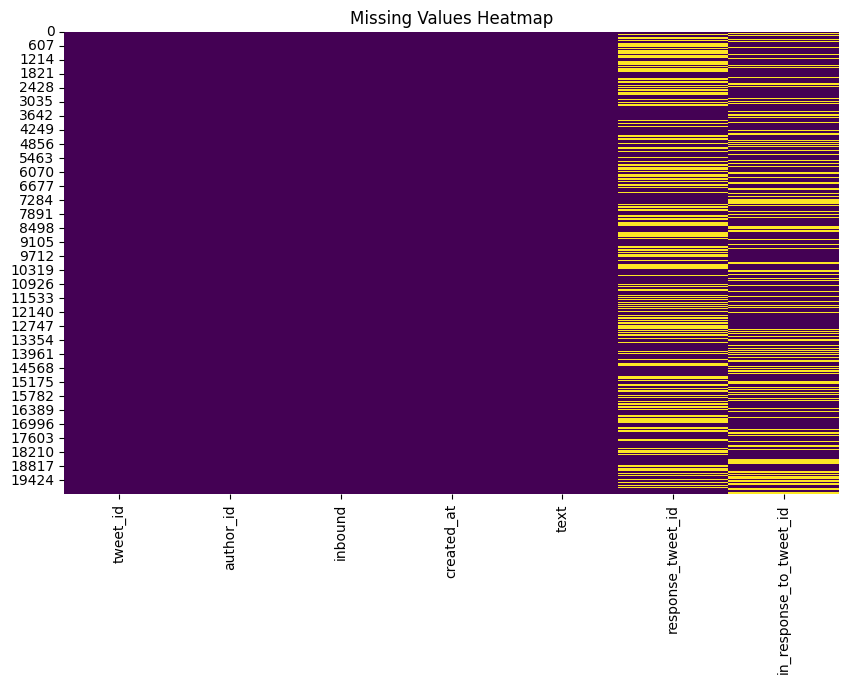

In [750]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

    # Handling missing values in the numerical column by imputing NaN with mean

In [751]:
imputer = SimpleImputer(strategy='mean')
data['in_response_to_tweet_id'] = imputer.fit_transform(data[['in_response_to_tweet_id']])

    # Visualizing the remaining missing values

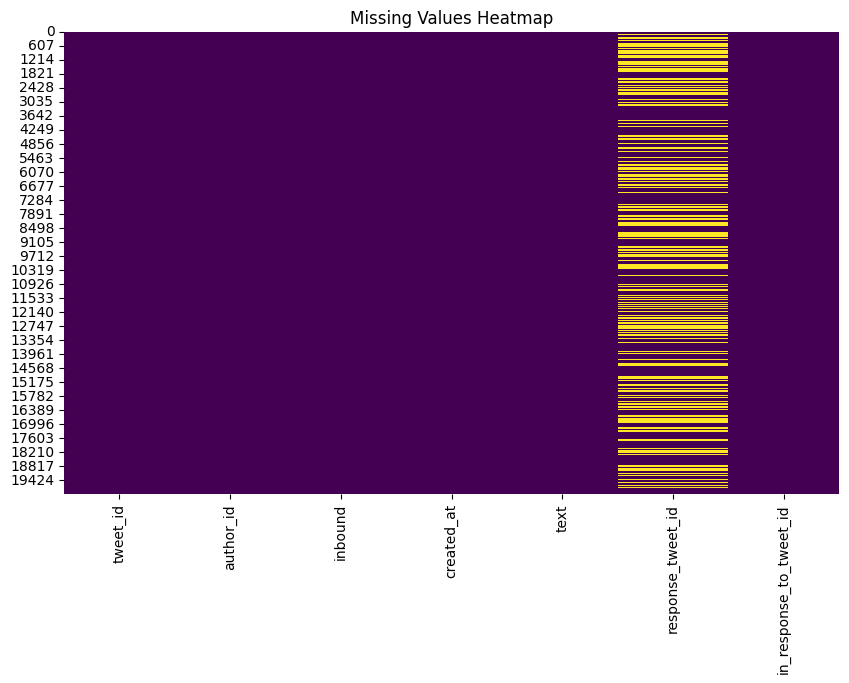

In [752]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [753]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tweet_id                 20000 non-null  int64  
 1   author_id                20000 non-null  object 
 2   inbound                  20000 non-null  bool   
 3   created_at               20000 non-null  object 
 4   text                     20000 non-null  object 
 5   response_tweet_id        12513 non-null  object 
 6   in_response_to_tweet_id  20000 non-null  float64
dtypes: bool(1), float64(1), int64(1), object(4)
memory usage: 957.2+ KB


# Data Transformation

    # Handling missing values in the mixed-datatype column by label encoding

In [754]:
label_encoder = LabelEncoder()
data['author_id_encoded'] = label_encoder.fit_transform(data['author_id'])
data['response_tweet_id_encoded'] = label_encoder.fit_transform(data['response_tweet_id'])
data['inbound_encoded'] = label_encoder.fit_transform(data['inbound'])
 

    # Dropping original (already transformed) features to avoid redundancy

In [755]:
data.drop(['response_tweet_id', 'author_id', 'inbound'], axis=1, inplace=True, errors='ignore')

    # Verifying that there are no redundacies  

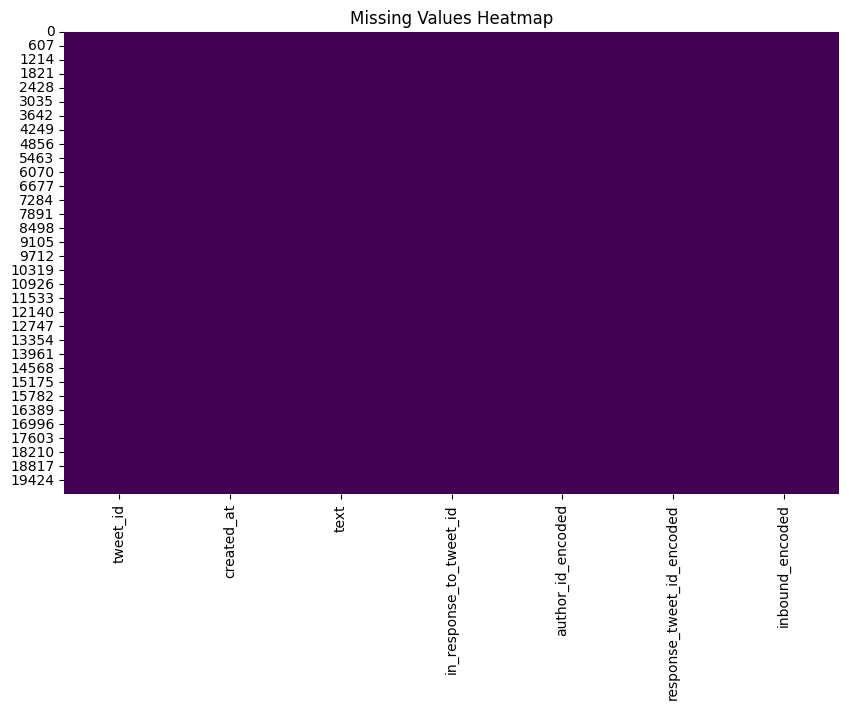

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   tweet_id                   20000 non-null  int64  
 1   created_at                 20000 non-null  object 
 2   text                       20000 non-null  object 
 3   in_response_to_tweet_id    20000 non-null  float64
 4   author_id_encoded          20000 non-null  int32  
 5   response_tweet_id_encoded  20000 non-null  int32  
 6   inbound_encoded            20000 non-null  int64  
dtypes: float64(1), int32(2), int64(2), object(2)
memory usage: 937.6+ KB


In [756]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

data.info()

# Feature Engineering: 

    # Creating a 'sentiment' feature from the column 'text'

    # Text cleaning: converting to lowercase

In [757]:
data['cleaned_text'] = data['text'].str.lower()

    # Text cleaning: removing punctuation

In [758]:
data['cleaned_text'] = data['cleaned_text'].str.replace(r'[^\w\s]', '', regex=True)

    # Text cleaning: removing leading/trailing spaces

In [759]:
data['cleaned_text'] = data['cleaned_text'].str.strip()  

    # Using VADER sentiment analyzer to define sentiment polarity

In [760]:
analyzer = SentimentIntensityAnalyzer()
data['sentiment_polarity'] = data['cleaned_text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])


    # Categorizing Sentiment

In [761]:
def categorize_sentiment(polarity):
    if polarity > 0.1:
        return "Positive"
    elif polarity < -0.1:
        return "Negative"
    else:
        return "Neutral"

data['sentiment'] = data['sentiment_polarity'].apply(categorize_sentiment)


    # Encoding sentiment labels as numerical values

In [762]:
label_encoder = LabelEncoder()
data['sentiment_encoded'] = label_encoder.fit_transform(data['sentiment'])

    # Defining TF-IDF features

In [763]:
if 'text_features' not in locals():
    tfidf = TfidfVectorizer(max_features=1000)
    text_features = tfidf.fit_transform(data['text'])

    # Converting sentiment_encoded to a sparse matrix

In [764]:
sentiment_feature = data[['sentiment_encoded']].values
sentiment_feature_sparse = csr_matrix(sentiment_feature)

    # Combining the TF-IDF features and sentiment feature

In [765]:
X_combined = hstack([text_features, sentiment_feature_sparse])

# Consolidating a sigle dataframe

    # Combine all features into a single dataset

In [766]:
numerical_features = data[['sentiment_encoded', 'inbound_encoded', 'in_response_to_tweet_id', 'author_id_encoded','response_tweet_id_encoded']].values

    # Ensuring compatibility

In [767]:
numerical_features = np.array(numerical_features, dtype=np.float64)

    # Converting to sparse matrix

In [768]:
# Ensure numerical_features is a valid array or DataFrame
if 'numerical_features' not in locals():
    # Replace 'list_of_numerical_columns' with your actual numerical column names
    numerical_features = data[['list_of_numerical_columns']].values  

# Convert numerical_features to sparse matrix
numerical_features_sparse = csr_matrix(numerical_features)

# Ensure text_features is a valid sparse matrix
if 'text_features' not in locals():
    tfidf = TfidfVectorizer(max_features=1000)  # Adjust as needed
    text_features = tfidf.fit_transform(data['text_column'])  # Replace 'text_column' with your actual text column name

# Combine text_features and numerical_features_sparse
X_combined = hstack([text_features, numerical_features_sparse])

    # Visualizing the combined text and numerical features into a dataframe

In [769]:
combined_df = data[['tweet_id', 'sentiment_encoded', 'inbound_encoded', 
                    'in_response_to_tweet_id', 'author_id_encoded', 
                    'response_tweet_id_encoded']]

    # Adding TF-IDF features to the DataFrame

In [770]:
tfidf_feature_names = tfidf.get_feature_names_out()
tfidf_df = pd.DataFrame(text_features.toarray(), columns=tfidf_feature_names)

    # Concatenating the TF-IDF features and other numerical features

In [771]:
final_df = pd.concat([combined_df.reset_index(drop=True), tfidf_df.reset_index(drop=True)], axis=1)

    # Displaying the final DataFrame

In [772]:
final_df.head()


,tweet_id,sentiment_encoded,inbound_encoded,in_response_to_tweet_id,author_id_encoded,response_tweet_id_encoded,00,10,100,11,...,ya,yeah,year,years,yes,yesterday,yet,you,your,zip
0,192624,1,1,1.926250e+05,1080,4266,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,738238,1,1,1.464906e+06,3567,11272,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,2414302,2,0,2.414304e+06,10732,6537,0.0,0.0,0.0,0.216547,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.242379,0.0,0.0
3,1793929,2,1,1.793930e+06,7369,3694,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,2088018,2,1,1.464906e+06,8251,5005,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


# Feature selection and importance 

    # Random Forest Classifier

In [773]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
import numpy as np
import pandas as pd

# Initialize Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the combined features
rf.fit(X_combined.toarray(), data['sentiment_encoded'])

# Get feature importances
feature_importances = rf.feature_importances_

# Combine feature names from TF-IDF and numerical features
tfidf_feature_names = tfidf.get_feature_names_out()
numerical_feature_names = ['sentiment_encoded', 'inbound_encoded', 
                           'in_response_to_tweet_id', 'author_id_encoded', 
                           'response_tweet_id_encoded']
combined_feature_names = np.array(list(tfidf_feature_names) + numerical_feature_names)

# Create a DataFrame of features and their importance
importance_df = pd.DataFrame({
    'Feature': combined_feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Select the top 10 features
top_5_features = importance_df.head(5)
selected_features = top_5_features['Feature'].values
selected_indices = [np.where(combined_feature_names == f)[0][0] for f in selected_features]

# Reduce X_combined to the top 20 features
X_selected_top_20 = X_combined[:, selected_indices]

print("Top 5 Selected Features:")
print(top_5_features)


Top 5 Selected Features:
                Feature  Importance
1000  sentiment_encoded    0.422546
1003  author_id_encoded    0.021899
653              please    0.021439
582                  no    0.019667
852              thanks    0.015687


# Correlation Analysis

    # Computing a correlation matrix

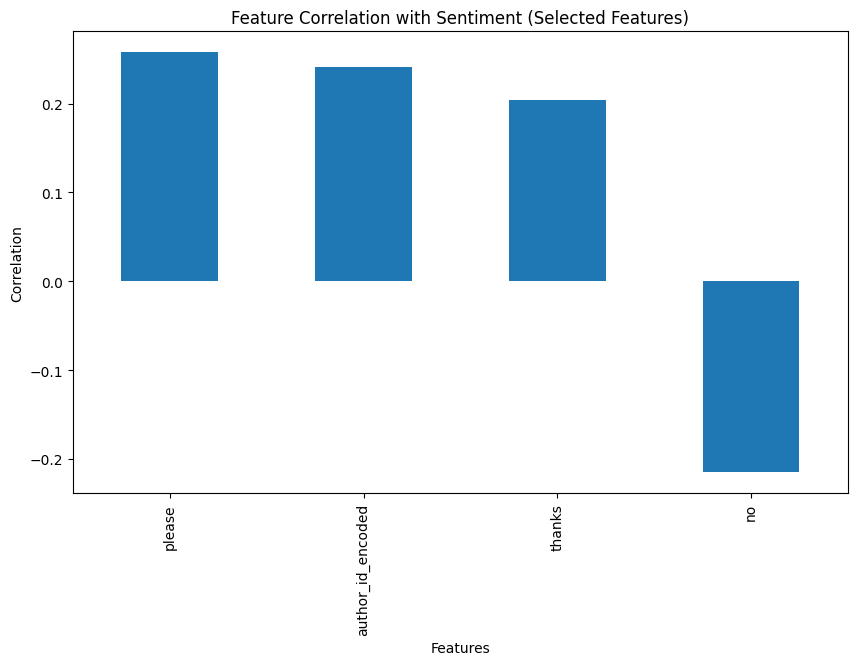

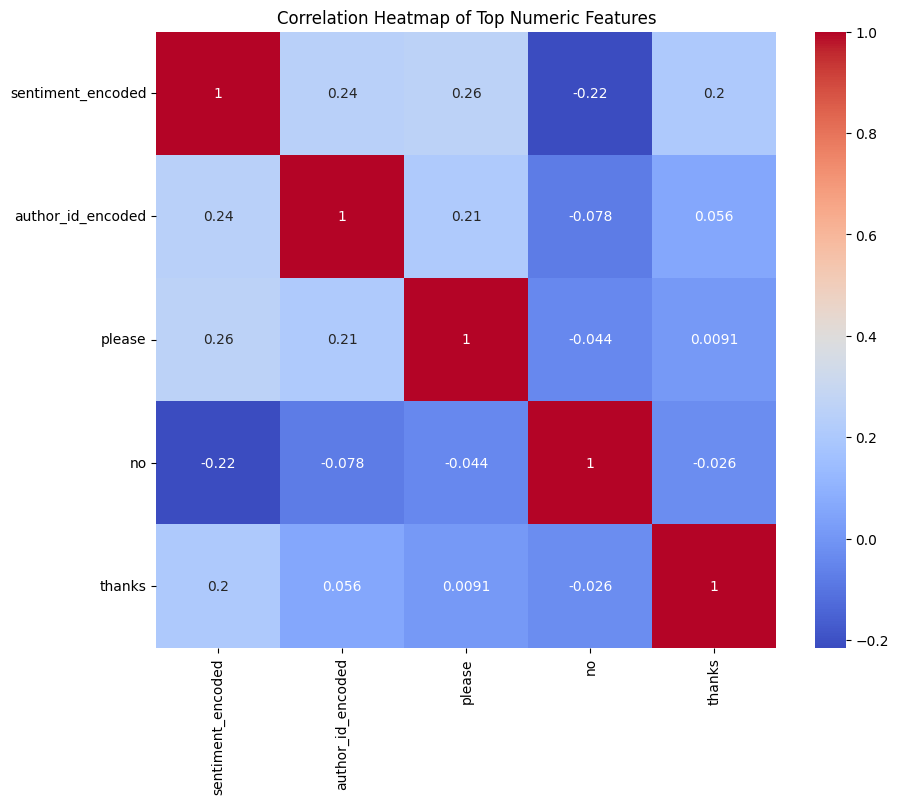

In [774]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame with selected features for correlation analysis
selected_df = pd.DataFrame(X_selected_top_20.toarray(), columns=selected_features)

# Add the target variable (sentiment_encoded) to the DataFrame for correlation
selected_df['sentiment_encoded'] = data['sentiment_encoded'].values

# Compute correlation matrix
correlation_matrix = selected_df.corr()

# Plot correlation bar chart for features with the target variable
target_correlation = correlation_matrix['sentiment_encoded'].drop('sentiment_encoded')
sorted_correlation = target_correlation.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sorted_correlation.plot(kind='bar')
plt.title('Feature Correlation with Sentiment (Selected Features)')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.show()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Top Numeric Features')
plt.show()

# Final preparation before model testing

    # Dynamically adjusting PCA components

In [775]:
max_components = min(X_selected_top_20.shape[0], X_selected_top_20.shape[1])
pca = PCA(n_components=min(15, max_components))  # Use at most 15 components or less if required
X_reduced = pca.fit_transform(X_selected_top_20.toarray())

    # Balancing the Dataset

In [776]:
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_reduced, data['sentiment_encoded'])

# Model Testing  

    # Train-Test Split

In [777]:
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

    # Model Selection

In [778]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Support Vector Machine": SVC()
}

    # Hyperparameter tuning

In [779]:
param_grids = {
    "Random Forest": {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 20], 'min_samples_split': [10, 20]},
    "Logistic Regression": {'C': [0.01, 0.1, 1]},
}

    # Testing and Evaluation

In [780]:
focused_models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
}

# Use Stratified Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = {}

for model_name, model in focused_models.items():
    print(f"--- Tuning and Testing: {model_name} ---")
    grid = GridSearchCV(model, param_grids[model_name], cv=cv, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[model_name] = acc
    print(f"Best Parameters: {grid.best_params_}")
    print(f"Accuracy: {acc * 100:.2f}%")
    print(classification_report(y_test, y_pred))

# Check Cross-Validation Scores
for model_name, model in focused_models.items():
    scores = cross_val_score(model, X_balanced, y_balanced, cv=cv, scoring='accuracy')
    print(f"Cross-Validation Accuracy for {model_name}: {scores.mean() * 100:.2f}% (±{scores.std() * 100:.2f}%)")


--- Tuning and Testing: Random Forest ---
Best Parameters: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 50}
Accuracy: 100.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1990
           1       1.00      1.00      1.00      1956
           2       1.00      1.00      1.00      1976

    accuracy                           1.00      5922
   macro avg       1.00      1.00      1.00      5922
weighted avg       1.00      1.00      1.00      5922

--- Tuning and Testing: Logistic Regression ---
Best Parameters: {'C': 0.01}
Accuracy: 100.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1990
           1       1.00      1.00      1.00      1956
           2       1.00      1.00      1.00      1976

    accuracy                           1.00      5922
   macro avg       1.00      1.00      1.00      5922
weighted avg       1.00      1.00      1.00      5922

Cros